In [1]:
#importing the liberies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("trending.csv/trending.csv")

## We display rows of dataframe

In [3]:
df.head()

,Unnamed: 0,id,original_title,original_language,release_date,popularity,vote_average,vote_count,media_type,adult
0,0,638974,Murder Mystery 2,English,2023-03-26,235.901,6.800,187,movie,False
1,1,677179,Creed III,English,2023-03-01,1537.879,7.200,561,movie,False
2,2,726759,Tetris,English,2023-03-15,66.661,7.700,100,movie,False
3,3,76600,Avatar: The Way of Water,English,2022-12-14,10224.280,7.742,6335,movie,False
4,4,849869,길복순,Korean,2023-02-17,33.985,6.900,39,movie,False


In [4]:
# I dropped the Unnamed and id from the index because they don't have any effect on the dataframe

In [5]:
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

In [6]:
df.head()

,original_title,original_language,release_date,popularity,vote_average,vote_count,media_type,adult
0,Murder Mystery 2,English,2023-03-26,235.901,6.800,187,movie,False
1,Creed III,English,2023-03-01,1537.879,7.200,561,movie,False
2,Tetris,English,2023-03-15,66.661,7.700,100,movie,False
3,Avatar: The Way of Water,English,2022-12-14,10224.280,7.742,6335,movie,False
4,길복순,Korean,2023-02-17,33.985,6.900,39,movie,False


# Getting information about our dataset to  know the  number of columns,rows, datatype and memory usage

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16080 entries, 0 to 16079
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     12060 non-null  object 
 1   original_language  16080 non-null  object 
 2   release_date       12060 non-null  object 
 3   popularity         16080 non-null  float64
 4   vote_average       16080 non-null  float64
 5   vote_count         16080 non-null  int64  
 6   media_type         16080 non-null  object 
 7   adult              16080 non-null  bool   
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 895.2+ KB


In [8]:
df.size

128640

## To know the number of Rows and Columns 0, 1

In [9]:
df.shape

(16080, 8)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,16080.0,934.26200,2229.935599,30.374,61.75025,94.859,804.05375,10224.28
vote_average,16080.0,7.53635,1.057306,4.800,6.87500,7.721,8.04025,10.00
vote_count,16080.0,1039.75000,2326.961930,3.000,9.75000,53.500,363.00000,8697.00


In [11]:
df.describe(include=['object']).T

,count,unique,top,freq
original_title,12060,15,Murder Mystery 2,804
original_language,16080,5,English,12060
release_date,12060,15,2023-03-26,804
media_type,16080,2,movie,12060


## Check missing value in our dataset

In [12]:
print("Any missing value?",df.isnull().values.any())

Any missing value? True


In [13]:
df.isnull().sum()

original_title       4020
original_language       0
release_date         4020
popularity              0
vote_average            0
vote_count              0
media_type              0
adult                   0
dtype: int64

## To check the missing values through visualisation 

<AxesSubplot: >

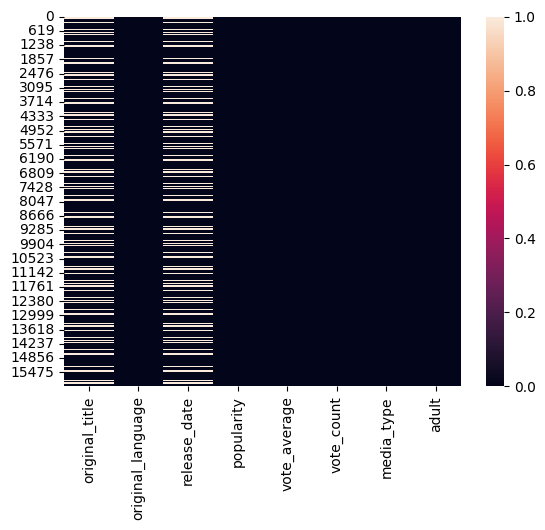

In [14]:
sns.heatmap(df.isnull())

## To check missing value in percentage % , Per_missing = df.isnull().sum() * 100 / len(df)

In [15]:
per_missing = df.isnull().sum() * 100 / len(df)

per_missing

original_title       25.0
original_language     0.0
release_date         25.0
popularity            0.0
vote_average          0.0
vote_count            0.0
media_type            0.0
adult                 0.0
dtype: float64

#### I realised that  25% are missing in both "Original_title" and "Release_date"

## I want to drop all the missing values

In [16]:
df.dropna(axis=0)

,original_title,original_language,release_date,popularity,vote_average,vote_count,media_type,adult
0,Murder Mystery 2,English,2023-03-26,235.901,6.800,187,movie,False
1,Creed III,English,2023-03-01,1537.879,7.200,561,movie,False
2,Tetris,English,2023-03-15,66.661,7.700,100,movie,False
3,Avatar: The Way of Water,English,2022-12-14,10224.280,7.742,6335,movie,False
4,길복순,Korean,2023-02-17,33.985,6.900,39,movie,False
...,...,...,...,...,...,...,...,...
16071,Rye Lane,English,2023-03-17,30.374,7.778,18,movie,False
16072,Operation Fortune: Ruse de Guerre,English,2023-01-04,184.229,6.721,297,movie,False
16074,Assassin,English,2023-03-31,80.805,4.800,11,movie,False
16076,Champions,English,2023-03-09,104.315,6.512,43,movie,False


## To check for duplicate data & if its there  we will drop it.

In [17]:
df_dup = df.duplicated().any()

In [18]:
print("are there any duplicate value?", df_dup)

are there any duplicate value? True


In [19]:
df = df.drop_duplicates()
df

,original_title,original_language,release_date,popularity,vote_average,vote_count,media_type,adult
0,Murder Mystery 2,English,2023-03-26,235.901,6.800,187,movie,False
1,Creed III,English,2023-03-01,1537.879,7.200,561,movie,False
2,Tetris,English,2023-03-15,66.661,7.700,100,movie,False
3,Avatar: The Way of Water,English,2022-12-14,10224.280,7.742,6335,movie,False
4,길복순,Korean,2023-02-17,33.985,6.900,39,movie,False
5,John Wick: Chapter 4,English,2023-03-22,2569.508,8.161,635,movie,False
6,Dungeons & Dragons: Honor Among Thieves,English,2023-03-23,702.523,7.598,128,movie,False
7,Prom Pact,English,2023-03-30,85.403,8.000,10,movie,False
8,NaN,English,NaN,64.625,8.000,8,tv,False
9,Momias,Spain,2023-01-05,1224.450,7.008,64,movie,False


## Get overall statistics about the dataframe

In [20]:
df.describe(include="all")

,original_title,original_language,release_date,popularity,vote_average,vote_count,media_type,adult
count,15,20,15,20.00000,20.000000,20.00000,20,20
unique,15,5,15,NaN,NaN,NaN,2,1
top,Murder Mystery 2,English,2023-03-26,NaN,NaN,NaN,movie,False
freq,1,15,1,NaN,NaN,NaN,15,20
mean,NaN,NaN,NaN,934.26200,7.536350,1039.75000,NaN,NaN
std,NaN,NaN,NaN,2287.79451,1.084739,2387.33833,NaN,NaN
min,NaN,NaN,NaN,30.37400,4.800000,3.00000,NaN,NaN
25%,NaN,NaN,NaN,61.75025,6.875000,9.75000,NaN,NaN
50%,NaN,NaN,NaN,94.85900,7.721000,53.50000,NaN,NaN
75%,NaN,NaN,NaN,804.05375,8.040250,363.00000,NaN,NaN


In [21]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
original_title,15,15,Murder Mystery 2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
original_language,20,5,English,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_date,15,15,2023-03-26,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
popularity,20.0,NaN,NaN,NaN,934.262,2287.79451,30.374,61.75025,94.859,804.05375,10224.28
vote_average,20.0,NaN,NaN,NaN,7.53635,1.084739,4.8,6.875,7.721,8.04025,10.0
vote_count,20.0,NaN,NaN,NaN,1039.75,2387.33833,3.0,9.75,53.5,363.0,8697.0
media_type,20,2,movie,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adult,20,1,False,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.columns

Index(['original_title', 'original_language', 'release_date', 'popularity',
       'vote_average', 'vote_count', 'media_type', 'adult'],
      dtype='object')

In [23]:
df["original_title"].fillna('unknown', inplace=True)

In [24]:
df["original_title"].unique()

array(['Murder Mystery 2', 'Creed III', 'Tetris',
       'Avatar: The Way of Water', '길복순', 'John Wick: Chapter 4',
       'Dungeons & Dragons: Honor Among Thieves', 'Prom Pact', 'unknown',
       'Momias', 'Murder Mystery', 'Rye Lane',
       'Operation Fortune: Ruse de Guerre', 'Assassin', 'Champions',
       'On a Wing and a Prayer'], dtype=object)

In [25]:
df["original_title"].value_counts()

unknown                                    5
Murder Mystery 2                           1
Creed III                                  1
Tetris                                     1
Avatar: The Way of Water                   1
길복순                                        1
John Wick: Chapter 4                       1
Dungeons & Dragons: Honor Among Thieves    1
Prom Pact                                  1
Momias                                     1
Murder Mystery                             1
Rye Lane                                   1
Operation Fortune: Ruse de Guerre          1
Assassin                                   1
Champions                                  1
On a Wing and a Prayer                     1
Name: original_title, dtype: int64

## In which year there was the highest average popularity 

In [26]:
df.groupby('release_date')["popularity"].mean().sort_values(ascending=False)

release_date
2022-12-14    10224.280
2023-03-22     2569.508
2023-03-01     1537.879
2023-01-05     1224.450
2023-03-23      702.523
2023-03-26      235.901
2019-05-25      197.421
2023-01-04      184.229
2023-03-09      104.315
2023-03-30       85.403
2023-03-31       80.805
2023-03-15       66.661
2023-04-06       53.714
2023-02-17       33.985
2023-03-17       30.374
Name: popularity, dtype: float64

## We can visualise this

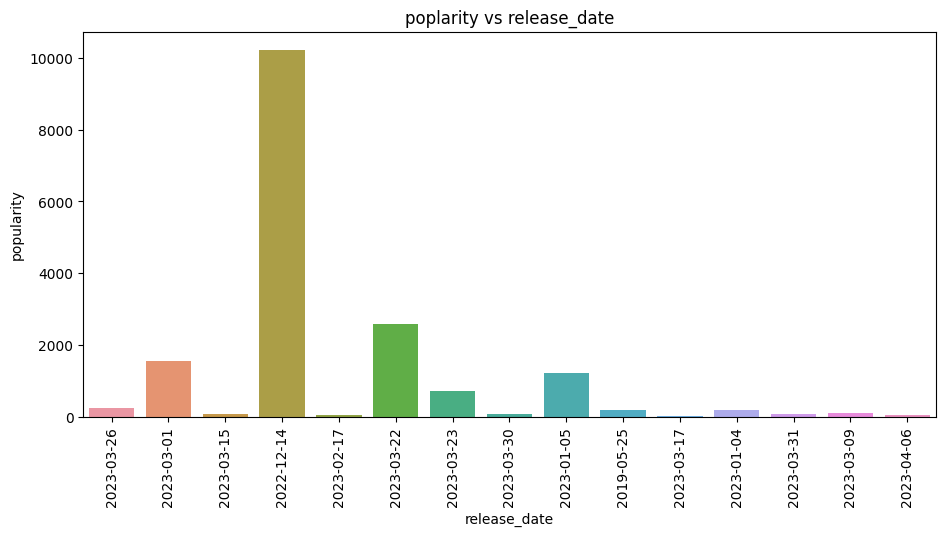

In [27]:
plt.figure(figsize = (11,5))
plt.xticks(rotation=90)
sns.barplot(x= df['release_date'], y= df['popularity'].astype(int))
plt.title('poplarity vs release_date')
plt.show()

In [28]:
df.columns

Index(['original_title', 'original_language', 'release_date', 'popularity',
       'vote_average', 'vote_count', 'media_type', 'adult'],
      dtype='object')

## To find the original language and the release date

In [29]:
df_popularity = df.groupby('original_language')['vote_count'].sum()
df_popularity

original_language
Chinese         9
English     20676
Japanese        7
Korean         39
Spain          64
Name: vote_count, dtype: int64

In [30]:
df_ginal = df[['release_date', 'original_language']].copy() 
df_ginal

,release_date,original_language
0,2023-03-26,English
1,2023-03-01,English
2,2023-03-15,English
3,2022-12-14,English
4,2023-02-17,Korean
5,2023-03-22,English
6,2023-03-23,English
7,2023-03-30,English
8,NaN,English
9,2023-01-05,Spain


## To visualise the most view languages 

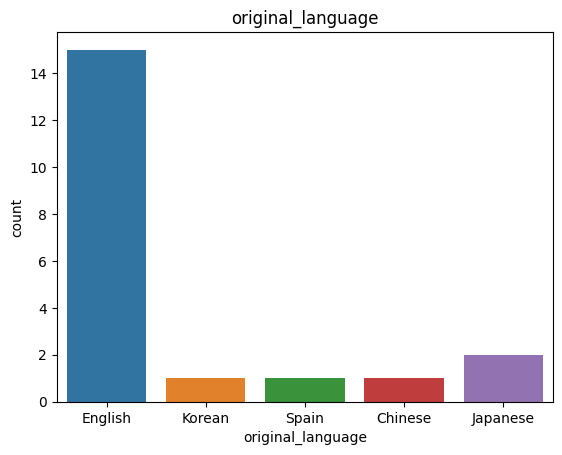

In [31]:
sns.countplot(x=df_ginal['original_language'])
plt.title('original_language')
plt.show()

## To check the top 10 highest performing movie 

In [32]:
df.columns

Index(['original_title', 'original_language', 'release_date', 'popularity',
       'vote_average', 'vote_count', 'media_type', 'adult'],
      dtype='object')

In [33]:
df.nlargest(10, 'vote_count')[['original_title', 'vote_count']]

,original_title,vote_count
19,unknown,8697
3,Avatar: The Way of Water,6335
10,Murder Mystery,3642
5,John Wick: Chapter 4,635
1,Creed III,561
12,Operation Fortune: Ruse de Guerre,297
0,Murder Mystery 2,187
6,Dungeons & Dragons: Honor Among Thieves,128
2,Tetris,100
9,Momias,64


In [34]:
df_top10 = df.nlargest(10, 'vote_count')[['original_title', 'vote_count']]\
.set_index('original_title')
df_top10

,vote_count
original_title,
unknown,8697
Avatar: The Way of Water,6335
Murder Mystery,3642
John Wick: Chapter 4,635
Creed III,561
Operation Fortune: Ruse de Guerre,297
Murder Mystery 2,187
Dungeons & Dragons: Honor Among Thieves,128
Tetris,100


C:\Users\Best\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Best\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Best\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


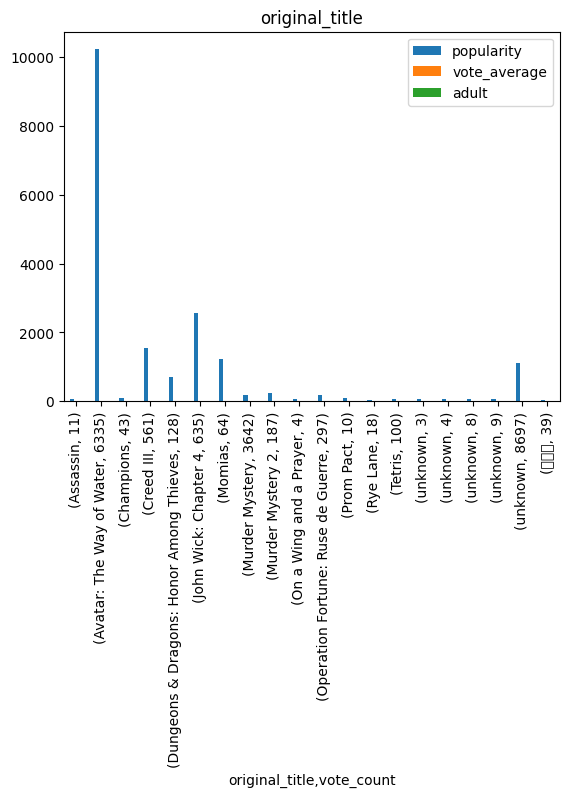

In [35]:
df.groupby(['original_title','vote_count']).sum().plot(kind='bar')
plt.title('original_title') 
plt.show()

In [36]:
# Going by this discovery Avatar:The way of Water was the highest viewing followed by John  Wick

In [37]:
df_avg = (df['vote_average'].max())
df_avg

10.0

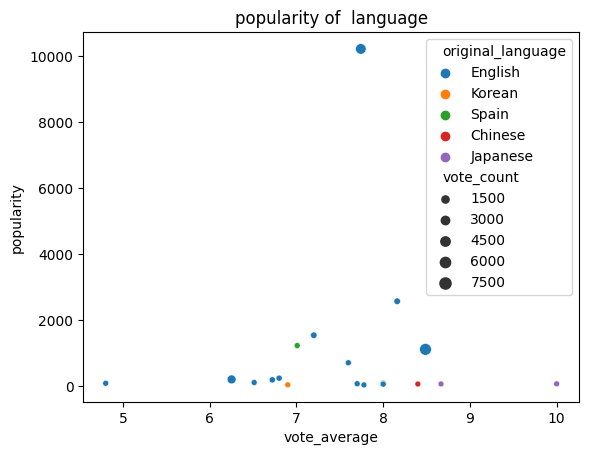

In [38]:
sns.scatterplot(data=df, x="vote_average", y="popularity", hue="original_language", size="vote_count")
plt.title('popularity of  language')
plt.show()

In [39]:
df.columns

Index(['original_title', 'original_language', 'release_date', 'popularity',
       'vote_average', 'vote_count', 'media_type', 'adult'],
      dtype='object')

In [40]:
df['media_type'].unique()

array(['movie', 'tv'], dtype=object)

In [41]:
df['adult'].count()

20

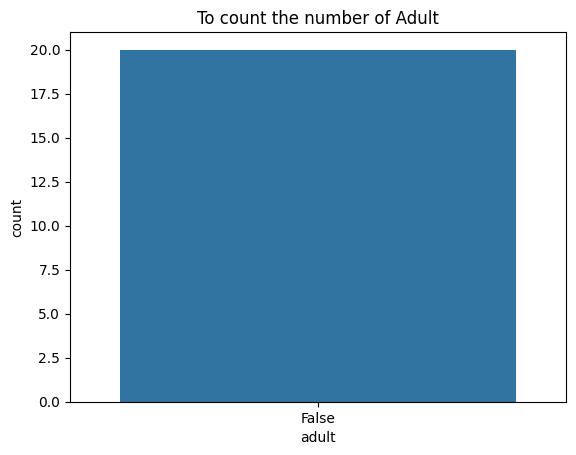

In [42]:
sns.countplot(x=df['adult'])
plt.title('To count the number of Adult')
plt.show()

In [43]:
len(df[df['media_type'].str.contains('sci-fi', case=False)])

0

In [44]:
df['vote_average'].count()

20

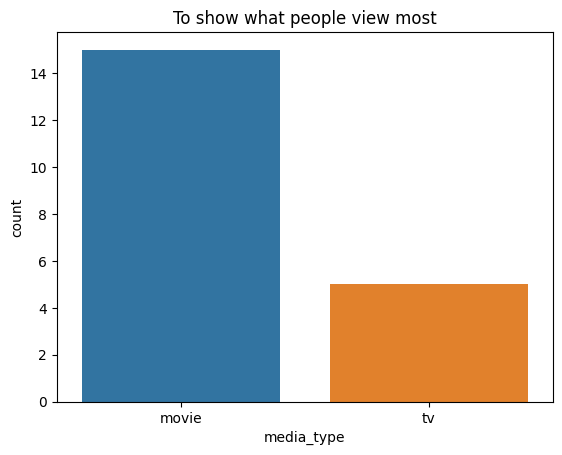

In [45]:
sns.countplot(x = df['media_type'])
plt.title('To show what people view most')
plt.show()

In [46]:
df.to_csv('trending_clean.csv')